# Abalone Case Study

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
abalone=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
abalone.shape

(4177, 9)

In [6]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
abalone.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

In [8]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Rings', ylabel='Count'>

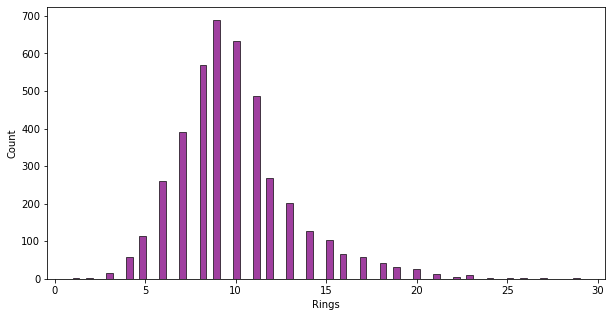

In [10]:
#plotting ring values
plt.figure(figsize=(10,5))
sns.histplot(x="Rings",data=abalone,color='Purple')

Skewed left

<AxesSubplot:xlabel='Shell weight', ylabel='Count'>

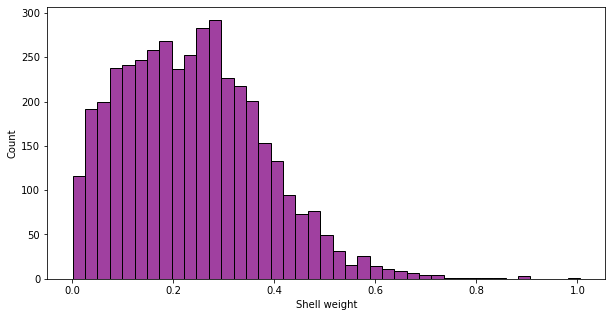

In [11]:
#plotting shell weight
plt.figure(figsize=(10,5))
sns.histplot(x="Shell weight",data=abalone,color='Purple')

Skewed left

<AxesSubplot:xlabel='Viscera weight', ylabel='Count'>

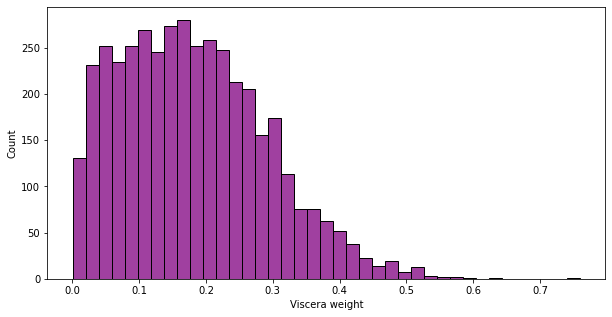

In [12]:
#Plotting viscera weight
plt.figure(figsize=(10,5))
sns.histplot(x='Viscera weight',data=abalone,color='Purple')

Skewed left

<AxesSubplot:xlabel='Shucked weight', ylabel='Count'>

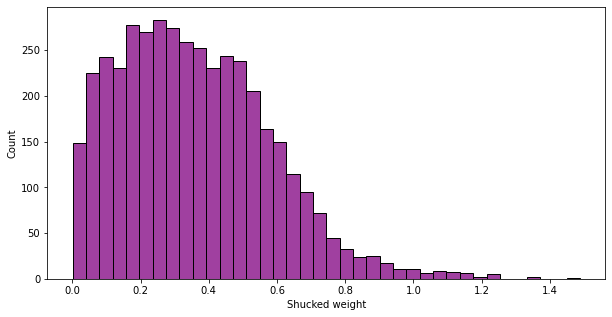

In [63]:
#plotting shucked weight 
plt.figure(figsize=(10,5)) 
sns.histplot(x='Shucked weight',data=abalone,color='Purple')

Skewed left

<AxesSubplot:xlabel='Whole weight', ylabel='Count'>

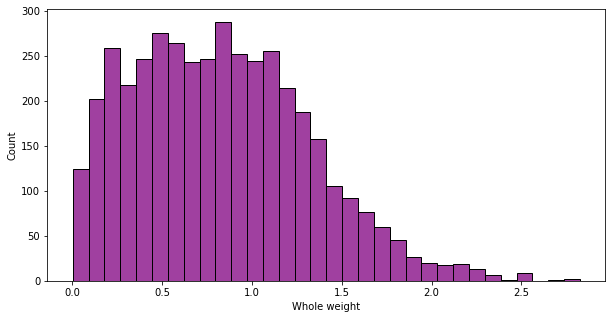

In [14]:
#plotting whole weight
plt.figure(figsize=(10,5))
sns.histplot(x="Whole weight",data=abalone,color='Purple')

<AxesSubplot:xlabel='Height', ylabel='Count'>

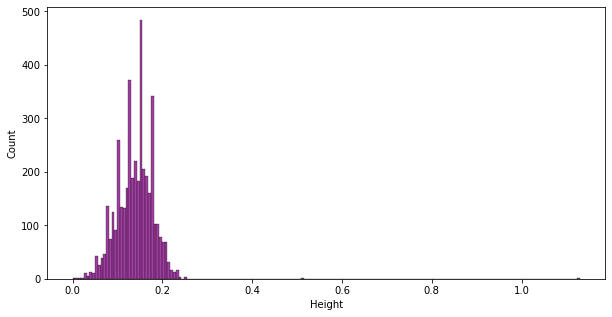

In [15]:
#plotting height
plt.figure(figsize=(10,5))
sns.histplot(x="Height",data=abalone,color='Purple')

<AxesSubplot:xlabel='Diameter', ylabel='Count'>

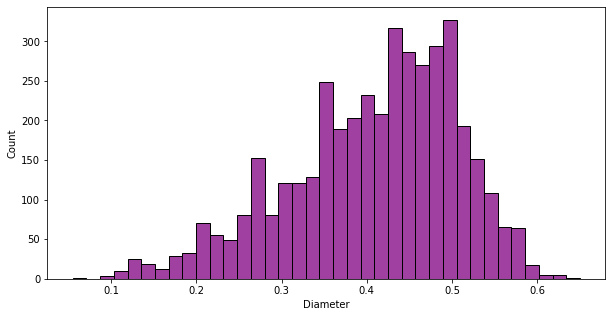

In [16]:
#plotting diameter
plt.figure(figsize=(10,5))
sns.histplot(x="Diameter",data=abalone,color='Purple')

<AxesSubplot:xlabel='Length', ylabel='Count'>

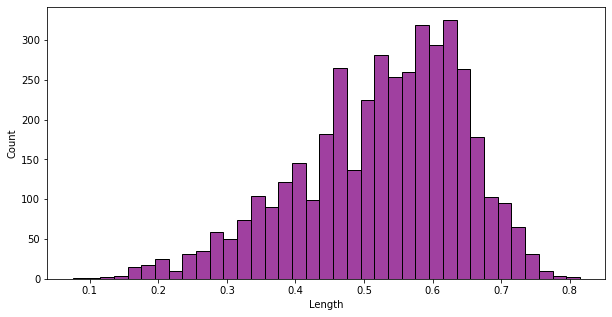

In [17]:
#plotting length
plt.figure(figsize=(10,5))
sns.histplot(x="Length",data=abalone,color='Purple')

In [18]:
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [19]:
abalone.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

<AxesSubplot:>

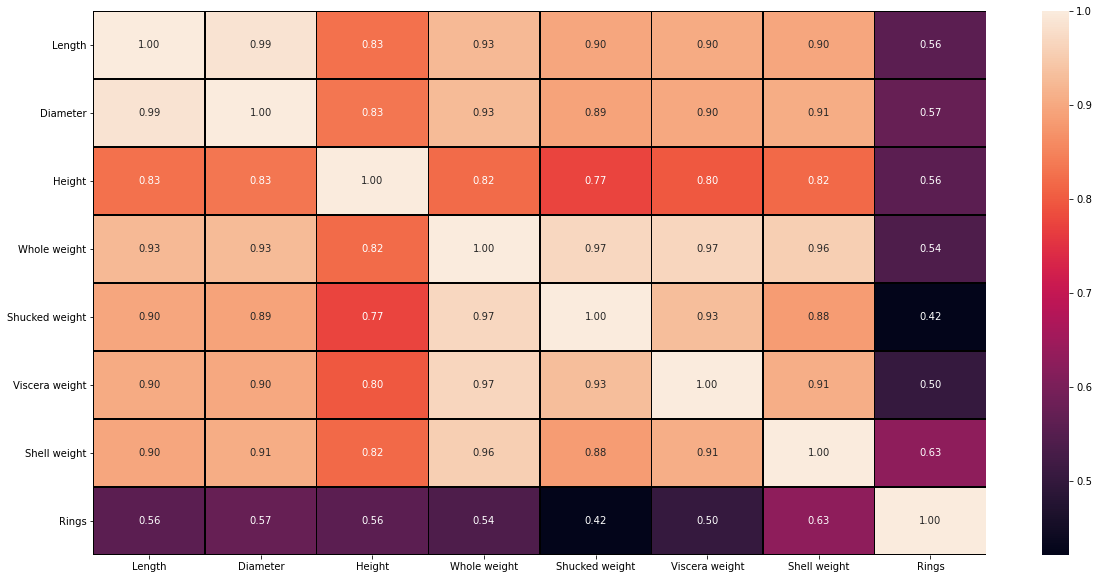

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(abalone.corr(),annot=True,linecolor='black',linewidth=0.5,fmt='.2f')

# Pre Processing of ML Algorithm

In [21]:
abalone["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [22]:
x = abalone.drop(columns='Sex')
y = abalone['Sex']

In [23]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [24]:
y

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [25]:
z=np.abs(zscore(x))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [26]:
z_scores = zscore(x)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_x = x[filtered_entries]

new_x.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder()
#for column in x.columns:
    #x[column]=labelencoder.fit_transform(x[column])

In [28]:
#X=abalone.iloc[:, :-1].values
#y=abalone.iloc[:, -1].values

In [29]:
#X

In [30]:
#y

In [31]:
# the test set will be 30% OF Dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

print(x_train.shape) 
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2923, 8)
(1254, 8)
(2923,)
(1254,)


In [32]:
lr = LogisticRegression(solver='liblinear',fit_intercept=True)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
result_acc = accuracy_score(y_test,y_pred) 

In [33]:
result_acc

0.5685805422647527

[[115  74 188]
 [ 14 354  51]
 [103 111 244]]


<Figure size 720x432 with 0 Axes>

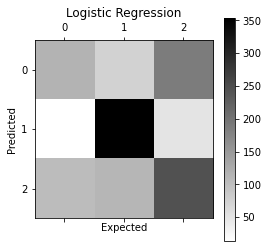

In [34]:
cmlr=confusion_matrix(y_test,y_pred)
pd.DataFrame(cmlr)
print(cmlr)


fg=plt.figure(figsize=(10,6))
plt.matshow(cmlr,cmap=plt.cm.binary,interpolation="nearest")
plt.title("Logistic Regression")
plt.colorbar()
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show(

# SVM Model

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [53]:
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 
svmModel.fit(x_train, y_train)
Y_pred = svmModel.predict(x_test)
result_acc = accuracy_score(y_test,y_pred) 

In [54]:
result_acc

0.5685805422647527

In [55]:
new_df = abalone.copy()

In [56]:
new_df['newRings_1'] = np.where(abalone['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((abalone['Rings'] > 8) & (abalone['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(abalone['Rings'] > 10,3,0)

In [57]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [58]:
Xtrain = new_df.drop(['Rings','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_df['newRings']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [60]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
svmModel.fit(x_train, y_train)
Y_pred = svmModel.predict(x_test)
result_acc = accuracy_score(y_test,y_pred) 

In [61]:
result_acc

0.5685805422647527

# Outcome

In [ ]:
# Above dataset has 4177 rows and 9 columns.
# Applied 2 models named logistic regression and svm model.
#Getting the same result in both the models.